# Credit EDA Case Study

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
pd.options.display.max_columns = 500
pd.options.display.max_rows = 122
import warnings
warnings.filterwarnings('ignore')

## Reading application.csv dataset

In [2]:
app = pd.read_csv('application_data.csv')

## Inspecting the Data Frame

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
app.shape

(307511, 122)

In [5]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Cleaning

#### Function to find missing values in percentage given a dataframe

In [6]:
def missingVals(df):
    null_cols = df.isnull().sum() * 100 / len(df)
    null_cols_df = pd.DataFrame({'percent_missing': null_cols})
    null_cols_df.sort_values(by='percent_missing', ascending=False, inplace=True)
    print(null_cols_df)

In [7]:
missingVals(app)

                              percent_missing
COMMONAREA_MEDI                     69.872297
COMMONAREA_AVG                      69.872297
COMMONAREA_MODE                     69.872297
NONLIVINGAPARTMENTS_MODE            69.432963
NONLIVINGAPARTMENTS_AVG             69.432963
NONLIVINGAPARTMENTS_MEDI            69.432963
FONDKAPREMONT_MODE                  68.386172
LIVINGAPARTMENTS_MODE               68.354953
LIVINGAPARTMENTS_AVG                68.354953
LIVINGAPARTMENTS_MEDI               68.354953
FLOORSMIN_AVG                       67.848630
FLOORSMIN_MODE                      67.848630
FLOORSMIN_MEDI                      67.848630
YEARS_BUILD_MEDI                    66.497784
YEARS_BUILD_MODE                    66.497784
YEARS_BUILD_AVG                     66.497784
OWN_CAR_AGE                         65.990810
LANDAREA_MEDI                       59.376738
LANDAREA_MODE                       59.376738
LANDAREA_AVG                        59.376738
BASEMENTAREA_MEDI                 

#### Dropping columns with more than 40% null values from application dataset
- 49 columns are there with more than 40% null values 

In [8]:
limitPer = len(app) * 0.60
app = app.dropna(thresh=limitPer,axis=1)

In [9]:
missingVals(app)

                                             column_name  percent_missing
OCCUPATION_TYPE                          OCCUPATION_TYPE        31.345545
EXT_SOURCE_3                                EXT_SOURCE_3        19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    AMT_REQ_CREDIT_BUREAU_YEAR        13.501631
AMT_REQ_CREDIT_BUREAU_QRT      AMT_REQ_CREDIT_BUREAU_QRT        13.501631
AMT_REQ_CREDIT_BUREAU_MON      AMT_REQ_CREDIT_BUREAU_MON        13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    AMT_REQ_CREDIT_BUREAU_WEEK        13.501631
AMT_REQ_CREDIT_BUREAU_DAY      AMT_REQ_CREDIT_BUREAU_DAY        13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    AMT_REQ_CREDIT_BUREAU_HOUR        13.501631
NAME_TYPE_SUITE                          NAME_TYPE_SUITE         0.420148
OBS_30_CNT_SOCIAL_CIRCLE        OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE        DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE        OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE        DEF_60

- <b>'Occupation Type' has 31% missing values and since this might help us in analysis, let's not drop this.
-  Also, since 31% are null, we cannot impute as the analysis might get biased so, let's replace the null values with 'UNKNOWN'</b>

In [10]:
app['OCCUPATION_TYPE'] = app['OCCUPATION_TYPE'].fillna('UNKNOWN')

In [11]:
app.OCCUPATION_TYPE.value_counts()

UNKNOWN                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Function to replace null values of numerical columns with median

In [12]:
def replaceNull(df,cols):
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)

- <b>Replacing numberical columns with 20% or less null values with median as many of them seem to have outliers and cannot be replaced with mean since replacing with mean can lead to bias in our analysis. </b>

In [13]:
replaceNull(app,['EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 
                 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR','EXT_SOURCE_2',
                 'AMT_GOODS_PRICE','AMT_ANNUITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE'])

- <b>Replacing the missing values in Categorical variables NAME_TYPE_SUITE with the MODE value 'Unaccompanied'</b>

In [14]:
app['NAME_TYPE_SUITE'].fillna(app.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [15]:
missingVals(app)

                                             column_name  percent_missing
SK_ID_CURR                                    SK_ID_CURR              0.0
REG_CITY_NOT_WORK_CITY            REG_CITY_NOT_WORK_CITY              0.0
FLAG_DOCUMENT_8                          FLAG_DOCUMENT_8              0.0
FLAG_DOCUMENT_7                          FLAG_DOCUMENT_7              0.0
FLAG_DOCUMENT_6                          FLAG_DOCUMENT_6              0.0
FLAG_DOCUMENT_5                          FLAG_DOCUMENT_5              0.0
FLAG_DOCUMENT_4                          FLAG_DOCUMENT_4              0.0
FLAG_DOCUMENT_3                          FLAG_DOCUMENT_3              0.0
FLAG_DOCUMENT_2                          FLAG_DOCUMENT_2              0.0
DAYS_LAST_PHONE_CHANGE            DAYS_LAST_PHONE_CHANGE              0.0
DEF_60_CNT_SOCIAL_CIRCLE        DEF_60_CNT_SOCIAL_CIRCLE              0.0
OBS_60_CNT_SOCIAL_CIRCLE        OBS_60_CNT_SOCIAL_CIRCLE              0.0
DEF_30_CNT_SOCIAL_CIRCLE        DEF_30

## Checking Data Types

<b>Following columns are in float but since they are discrete variables, converting them to integer</b>

In [16]:
app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].astype(int)
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].astype(int)
app['OBS_30_CNT_SOCIAL_CIRCLE'] = app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int)
app['DEF_30_CNT_SOCIAL_CIRCLE'] = app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int)
app['DEF_60_CNT_SOCIAL_CIRCLE'] = app['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int)
app['OBS_60_CNT_SOCIAL_CIRCLE'] = app['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int)
app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].astype(int)
app['AMT_REQ_CREDIT_BUREAU_QRT'] = app['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int)
app['AMT_REQ_CREDIT_BUREAU_MON'] = app['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)
app['AMT_REQ_CREDIT_BUREAU_WEEK'] = app['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int)
app['AMT_REQ_CREDIT_BUREAU_DAY'] = app['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int)
app['AMT_REQ_CREDIT_BUREAU_HOUR'] = app['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int)
app['AMT_REQ_CREDIT_BUREAU_YEAR'] = app['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)

In [17]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<b>Converting few numerical columns with negative values to positive</b>

In [18]:
#Converting negative values of DAYS_ID_PUBLISH to positive
app['DAYS_ID_PUBLISH']=abs(app['DAYS_ID_PUBLISH'])
app['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

- <b>DAYS_BIRTH column represents age of the peron at the time of loan application. Along with handling the negative value, let's convert the days to years.<b>

In [19]:
#Converting age in years
app['AGE'] =app['DAYS_BIRTH']//-365.25
app.drop(['DAYS_BIRTH'],axis=1,inplace=True)

## Finding Outliers

#### Plotting the box plots of continuous variables to detect outliers

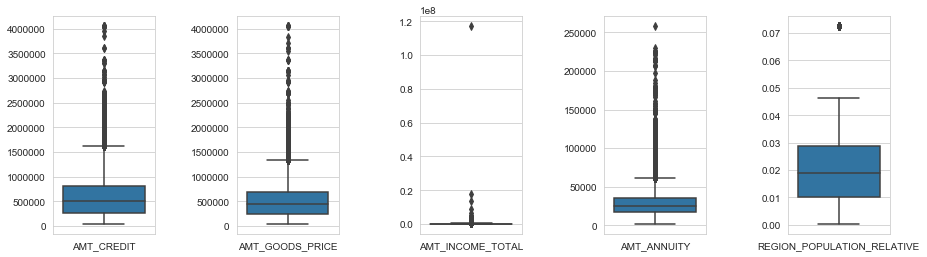

In [20]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,5,figsize=[15,4])
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data =app[['AMT_CREDIT']],ax=axes[0])
sns.boxplot(data =app[['AMT_GOODS_PRICE']],ax=axes[1])
sns.boxplot(data =app[['AMT_INCOME_TOTAL']],ax=axes[2])
sns.boxplot(data =app[['AMT_ANNUITY']],ax=axes[3])
sns.boxplot(data =app[['REGION_POPULATION_RELATIVE']],ax=axes[4])
plt.show()

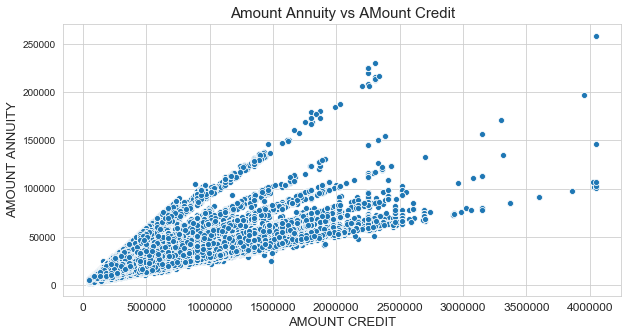

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=app, x='AMT_CREDIT', y='AMT_ANNUITY')
plt.title('Amount Annuity vs AMount Credit', fontsize=15)
plt.xlabel('AMOUNT CREDIT',fontsize=13)
plt.ylabel('AMOUNT ANNUITY',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

- <b> We can observe in the Box plots that the credit amount greater than 2 lakh are seen as outliers.
- As seen in the above Scatter plot, with the increase in Credi there is an increase in the AMT_ANNUITY. Thus, we can see higher annuity values corresponding to the higher credit values as an outlier. </b>

In [22]:
app[app['AMT_INCOME_TOTAL']>20000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-922,-6762,3643,1,1,0,1,0,0,Laborers,3,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34


- <b>In 'AMT_INCOME_TOTAL', this is an outlier with extremely high income. Also, the occupation type is recorded as labor working in Organization Type -'Business Entity Type 3'. This record doesn't seem to have a correct value of the income as a labor's income is ususally not so high. 
- We can impute this incorrect value with the average income of Laborers working in Organization Type -'Business Entity Type 3'.</b>

In [23]:
#Mean of all the Laborers working is Orgazization Type -'Business Entity Type 3' excluding the Incorrect Income Record

app[(app['OCCUPATION_TYPE']=='Laborers') & (app['ORGANIZATION_TYPE']=='Business Entity Type 3') 
   & (app['AMT_INCOME_TOTAL']<20000000)].AMT_INCOME_TOTAL.mean()

166996.15517931705

In [24]:
app.loc[app['AMT_INCOME_TOTAL']>20000000,'AMT_INCOME_TOTAL'] = 166996.15517931705

In [25]:
app[app['AMT_INCOME_TOTAL']>5000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,1377000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.010147,-8476,-7276,1656,1,1,0,1,0,0,Managers,2,2,2,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 1,0.504086,0.432962,1,0,1,0,-3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,-443,-7414,2886,1,1,1,1,1,0,Laborers,2,2,2,TUESDAY,14,0,1,1,0,1,1,Transport: type 4,0.552838,0.495666,0,0,0,0,-695,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,52
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,675000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,-4961,-3338,4728,1,1,0,1,0,0,UNKNOWN,4,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,0.535276,1,0,1,0,-1133,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,42
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,-280,-3953,4972,1,1,1,1,0,0,UNKNOWN,2,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,0.535276,0,0,0,0,-13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,37


- <b>These rest of the outliers in the above INCOME column seem to be people earning more, who are managers or in Business organizations. Thus, leaving them as it is.</b>

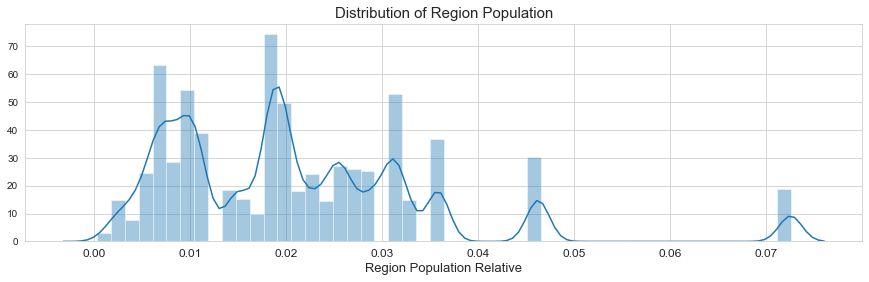

In [26]:
app.REGION_POPULATION_RELATIVE.describe()
plt.figure(figsize=(15,4))
sns.distplot(app.REGION_POPULATION_RELATIVE)
plt.title('Distribution of Region Population', fontsize=15)
plt.xlabel('Region Population Relative',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

- <b>The outliers seen in the 'REGION_POPULATION_RELATIVE' column are a bunch of people who stay in highly populated region.</b>

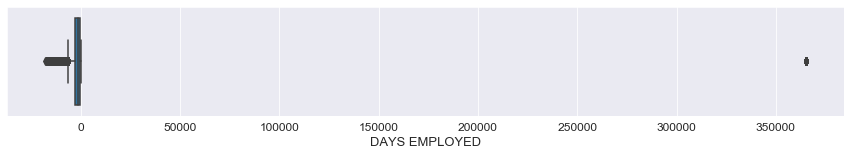

In [27]:
plt.figure(figsize=(15,2))
sns.set_style('darkgrid')
sns.boxplot(app.DAYS_EMPLOYED)
plt.xlabel('DAYS EMPLOYED',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

- <b>All the DAYS EMPLOYED are given in negative value. Let's analyse this postive outlier further.</b>

In [28]:
app[(app['DAYS_EMPLOYED']>350000)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,365243,-7427,3514,1,0,0,1,0,0,UNKNOWN,2,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,55
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,365243,-5246,2512,1,0,0,1,1,0,UNKNOWN,2,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0,0,0,0,-2396,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,55
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,365243,-9012,3684,1,0,0,1,1,0,UNKNOWN,2,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0,0,0,0,-795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,67
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,365243,-9817,4969,1,0,0,1,1,0,UNKNOWN,2,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0.751724,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,65
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,365243,-5745,4576,1,0,0,1,0,0,UNKNOWN,1,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0.684828,0,0,0,0,-491,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,365243,-11976,4171,1,0,0,1,0,0,UNKNOWN,1,2,2,MONDAY,15,0,0,0,0,0,0,XNA,0.195625,0.360613,11,2,11,0,-1667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,61
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,365243,-11211,4213,1,0,0,1,0,0,UNKNOWN,1,2,2,MONDAY,12,0,0,0,0,0,0,XNA,0.589906,0.520898,1,1,1,1,-1775,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,68
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.0101

In [29]:
app[(app['DAYS_EMPLOYED']<350000) & (app['NAME_INCOME_TYPE']=="Pensioner")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
18196,121224,0,Revolving loans,F,N,Y,0,94500.0,180000.0,9000.0,180000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.018850,-1346,-945,4221,1,1,1,1,1,0,UNKNOWN,2,2,2,FRIDAY,14,0,0,0,0,1,1,Business Entity Type 2,0.444632,0.216403,4,1,4,1,-2447,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,56
33165,138428,0,Revolving loans,M,N,Y,1,76500.0,225000.0,11250.0,360000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.031329,-5111,-11112,1979,1,1,1,1,1,0,UNKNOWN,2,2,2,THURSDAY,10,0,0,0,0,0,0,Industry: type 9,0.162192,0.292588,8,0,8,0,-711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,50
106630,223714,0,Revolving loans,F,N,Y,0,157500.0,180000.0,9000.0,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.028663,-2341,-6447,4837,1,1,1,1,1,0,Laborers,1,2,2,THURSDAY,8,0,0,0,0,1,1,Business Entity Type 3,0.460624,0.584990,7,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,60
108373,225712,0,Revolving loans,F,N,Y,0,135000.0,337500.0,16875.0,337500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.005313,-11194,-9357,4745,1,1,1,1,1,0,UNKNOWN,2,2,2,MONDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.636410,0.132597,0,0,0,0,-775,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,59
113694,231855,0,Revolving loans,F,N,Y,0,103500.0,180000.0,9000.0,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.024610,-12865,-6211,3467,1,1,1,1,1,0,Medicine staff,1,2,2,THURSDAY,14,0,0,0,0,0,0,Medicine,0.605882,0.394495,2,1,2,1,-732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,55
124165,243990,0,Revolving loans,F,N,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.031329,-1895,-14903,4283,1,1,1,1,1,0,UNKNOWN,2,2,2,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.665693,0.656158,0,0,0,0,-2273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,56
134595,256117,0,Revolving loans,M,Y,Y,0,78750.0,157500.0,7875.0,157500.0,Unaccompanied,Pensioner,Incomplete higher,Separated,House / apartment,0.031329,-8140,-971,4765,1,1,0,1,1,0,UNKNOWN,1,2,2,MONDAY,8,0,0,0,0,0,0,Military,0.384929,0.718033,0,0,0,0,-1888,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,41
206030,338811,0,Revolving loans,M,N,Y,0,157500.0,450000.0,22500.0,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.022625,-3261,-8086,4442,1,1,0,1,1,0,UNKNOWN,2,2,2,SATURDAY,11,0,0,0,0,0,0,Trade: type 7,0.359197,0.535276,0,0,0,0,-235,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
app[app['NAME_INCOME_TYPE']=="Unemployed"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,585000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.020713,365243,-115,4746,1,0,0,1,0,0,UNKNOWN,1,3,3,FRIDAY,5,0,0,0,0,0,0,XNA,0.105875,0.824595,0,0,0,0,-325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,365243,-4219,4212,1,0,0,1,0,0,UNKNOWN,3,3,2,MONDAY,11,0,0,0,0,0,0,XNA,0.617056,0.420611,2,0,2,0,-49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,43
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,783000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,365243,-5661,4715,1,0,0,1,0,0,UNKNOWN,1,3,3,TUESDAY,14,0,0,0,0,0,0,XNA,0.006939,0.535276,0,0,0,0,-1436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,64
35352,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,1530000.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.011703,365243,-5086,951,1,0,0,1,0,0,UNKNOWN,1,2,2,MONDAY,12,0,0,0,0,0,0,XNA,0.585243,0.535276,3,0,2,0,-1169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,47
37512,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,585000.0,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.025164,365243,-27,866,1,0,0,1,1,1,UNKNOWN,2,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.276265,0.535276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,33
41723,148306,0,Revolving loans,F,N,Y,0,270000.0,135000.0,6750.0,135000.0,Unaccompanied,Unemployed,Incomplete higher,Single / not married,Rented apartment,0.014464,365243,-4340,2484,1,0,0,1,0,0,UNKNOWN,1,2,2,THURSDAY,19,1,0,0,0,0,0,XNA,0.600470,0.535276,0,0,0,0,-529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27
77179,189489,0,Cash loans,F,N,N,1,54000.0,634500.0,23643.0,634500.0,Unaccompanied,Unemployed,Higher education,Civil marriage,House / apartment,0.020713,365243,-7167,4182,1,0,0,1,0,0,UNKNOWN,3,3,2,MONDAY,13,0,0,0,0,0,0,XNA,0.647398,0.535276,0,0,0,0,-685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36
78336,190812,1,Cash loans,F,N,Y,0,45000.0,328500.0,10629.0,328500.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.014520,365243,-8549,4268,1,0,0,1,0,0,UNKNOWN,1,2,2,WEDNESDAY,13,0,0,0,0,0,0,XNA,0.428753,0.535276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,62
80704,193571,1,Cash loans,F,N,Y,0,90000.0,571500.0,20524.5,571500.0,Unaccompanied,Unemployed,Secondary / secondary speci

- <b>According to the above analysis, the outlier value seen in the DAYS EMPLOYED (365243) is the same for all the records with NAME_INCOME_TYPE value as Pensioner or Unemployed. 
- Thus we cannot remove those values as it seems to be a garbage value. Instead, we can replace these values with 0(max value) as they are currently not employed.</b>

In [31]:
app.loc[(app['DAYS_EMPLOYED']>350000),'DAYS_EMPLOYED'] = 0

In [32]:
app[(app['DAYS_EMPLOYED']==0) & (app['NAME_INCOME_TYPE']!="Pensioner") & (app['NAME_INCOME_TYPE']!="Unemployed")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
23691,127568,0,Cash loans,F,N,N,2,189000.0,983299.5,36571.5,904500.0,Family,Working,Higher education,Separated,House / apartment,0.025164,0,-2116,4452,1,1,0,1,0,0,UNKNOWN,3,2,2,FRIDAY,8,0,0,0,0,0,0,Business Entity Type 1,0.323724,0.379100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,34
121625,241013,1,Cash loans,F,N,Y,1,112500.0,134775.0,7438.5,112500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007020,0,-4598,4385,1,1,1,1,1,0,Sales staff,3,2,2,MONDAY,10,0,0,0,1,0,1,Self-employed,0.558081,0.609276,0,0,0,0,-614,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41


- <b> Also, above are the 2 rows who are working and yet have Days UNEMPLOYED as 0. That is an anomaly detected.  

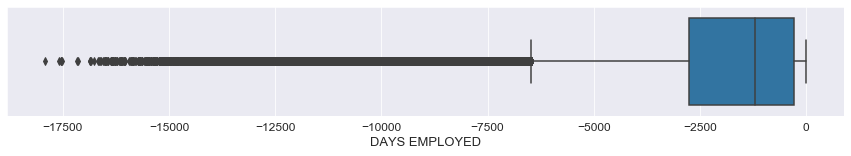

In [33]:
plt.figure(figsize=(15,2))
sns.boxplot(app.DAYS_EMPLOYED)
plt.xlabel('DAYS EMPLOYED',fontsize=13)
plt.xticks(fontsize=12)
plt.show()

In [34]:
app.CNT_CHILDREN.describe()
app[app['CNT_CHILDREN']>10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,927000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-198,-3940,844,1,1,0,1,0,0,Managers,13,2,2,FRIDAY,17,0,0,0,0,1,1,Other,0.567454,0.122955,0,0,0,0,-3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,47
80948,193853,0,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,675000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-2710,-2066,3908,1,1,0,1,0,0,Core staff,14,1,1,FRIDAY,13,0,0,0,0,0,0,Kindergarten,0.703253,0.132597,3,2,3,1,-357,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,38
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,-1853,-3096,745,1,1,1,1,1,0,Waiters/barmen staff,20,2,2,SUNDAY,11,0,0,0,0,0,0,Restaurant,0.553968,0.535276,1,1,1,1,-744,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,30
171125,298322,0,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,202500.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-2542,-1867,3709,1,1,1,1,1,0,Core staff,14,1,1,TUESDAY,13,0,0,0,0,0,0,Kindergarten,0.732542,0.355639,3,2,3,1,-158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,891000.0,Children,Working,Secondary / secondary special,Separated,House / apartment,0.031329,-1689,-7149,1298,1,1,0,1,0,0,Drivers,15,2,2,FRIDAY,8,0,0,0,0,0,0,Self-employed,0.513617,0.259468,0,0,0,0,-1718,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,48
183878,313127,0,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,810000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.008625,0,-12416,3829,1,0,0,1,0,0,UNKNOWN,16,2,2,TUESDAY,14,0,0,0,1,0,0,XNA,0.730308,0.672243,1,0,1,0,-1785,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,55
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,-896,-4733,2599,1,1,0,1,1,0,Core staff,20,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.167332,0.574447,1,0,1,0,-2495,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,28
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,540000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.011703,-540,-6222,4317,1,1,1,1,1,0,Managers,16,2,2,SUNDAY,14,0,0,0,0,0,0,Postal,0.712226,0.567379,0,0,0,0,-307,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,42


- <b>There are anomalies in CNT_CHILDREN. 19 childeren for unmarried people seems to be an anomaly.</b>

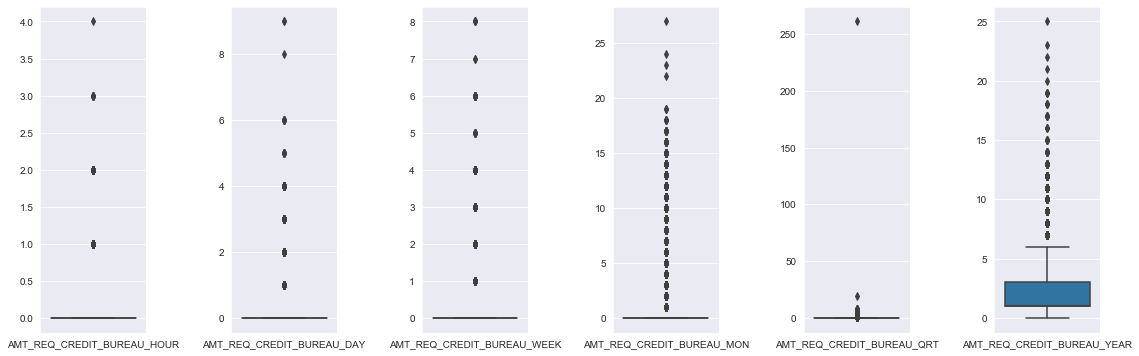

In [35]:
fig, axes = plt.subplots(1,6,figsize=[19,6])
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data =app[['AMT_REQ_CREDIT_BUREAU_HOUR']],ax=axes[0])
sns.boxplot(data =app[['AMT_REQ_CREDIT_BUREAU_DAY']],ax=axes[1])
sns.boxplot(data =app[['AMT_REQ_CREDIT_BUREAU_WEEK']],ax=axes[2])
sns.boxplot(data =app[['AMT_REQ_CREDIT_BUREAU_MON']],ax=axes[3])
sns.boxplot(data =app[['AMT_REQ_CREDIT_BUREAU_QRT']],ax=axes[4])
sns.boxplot(data =app[['AMT_REQ_CREDIT_BUREAU_YEAR']],ax=axes[5])
plt.show()

- <b>There are few outliers in the columns stating the number of enquiries made to the Bureau. 
- Seems like more enquires were made for few set of applicants.</b>

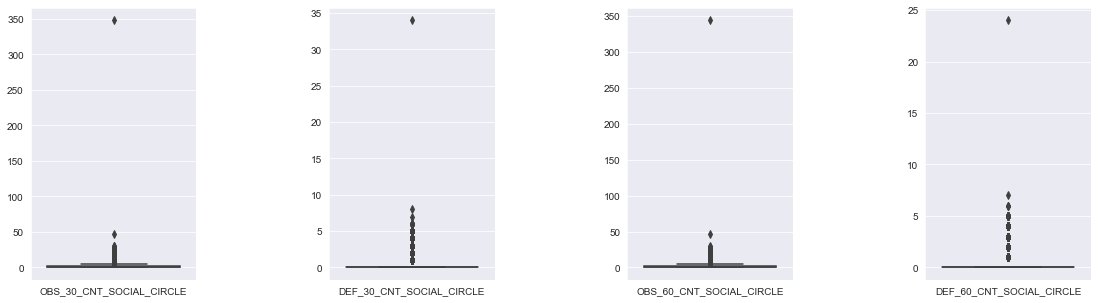

In [36]:
fig, axes = plt.subplots(1,4,figsize=[19,5])
plt.subplots_adjust(wspace=0.8)
sns.boxplot(data =app[['OBS_30_CNT_SOCIAL_CIRCLE']],ax=axes[0])
sns.boxplot(data =app[['DEF_30_CNT_SOCIAL_CIRCLE']],ax=axes[1])
sns.boxplot(data =app[['OBS_60_CNT_SOCIAL_CIRCLE']],ax=axes[2])
sns.boxplot(data =app[['DEF_60_CNT_SOCIAL_CIRCLE']],ax=axes[3])

plt.show()

In [37]:
app[app['DEF_30_CNT_SOCIAL_CIRCLE']> 30]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
148403,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,-1917,-2306,2306,1,1,0,1,0,0,Core staff,1,3,3,THURSDAY,9,0,0,0,0,1,1,Police,0.304506,0.357293,348,34,344,24,-667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,27


- <b>One record (with Occupation Type as Police) has high value of count of defaulters in the social circle columns which seems as an outlier. </b>

## Binning of few Contionuous variables

- <b>Creating bins for the Income Amount column</b>

In [38]:
bins = [0,75000,200000,400000,10000000000]
slot = ['Very Low','Low','Medium','High']
app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=slot)

In [39]:
app.AMT_INCOME_RANGE.value_counts()

Low         195705
Medium       79852
Very Low     23892
High          8062
Name: AMT_INCOME_RANGE, dtype: int64

- <b>Creating bins for the AGE column</b>

In [40]:
bins = [0,20,30,40,50,60,70]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

app['AGE_RANGE']=pd.cut(app['AGE'],bins,labels=slot)
app.AGE_RANGE.value_counts()

30-40    83212
40-50    74347
50-60    67864
20-30    52963
60-70    29124
0-20         1
Name: AGE_RANGE, dtype: int64

## Analyzing the Categotical variables

#### Creating a function to count the values given a list of categotical columns

In [41]:
def count_val(df,cols):
    for i in cols:
        x = df[i].value_counts()
        print("COLUMN NAME: ",i,"\n",x)
        print()

In [42]:
count_val(app,['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE'])

COLUMN NAME:  NAME_TYPE_SUITE 
 Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

COLUMN NAME:  NAME_INCOME_TYPE 
 Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

COLUMN NAME:  NAME_FAMILY_STATUS 
 Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

COLUMN NAME:  NAME_HOUSING_TYPE 
 House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartmen

In [43]:
app.ORGANIZATION_TYPE.value_counts(normalize=True).sort_values(ascending=False)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

- <b>The values XNA seems to be a replacement of NULL values/UNAVAILABLE values. 
- Since there is 18% of XNA values, we will neither replace nor impute it. Let it remain as a diff category. </b>

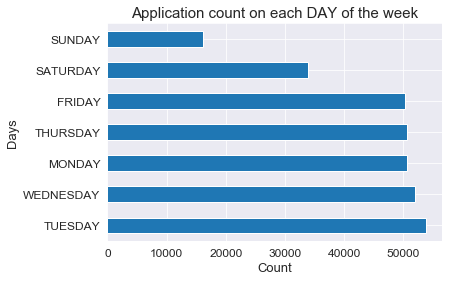

In [44]:
app.WEEKDAY_APPR_PROCESS_START.value_counts().plot.barh()
plt.title('Application count on each DAY of the week',fontsize=15)
plt.xlabel('Count',fontsize=13)
plt.ylabel('Days',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- <b>Weekends seems to have received less no of applications</b>

 <b>Converting the (Y/N) values in flagged categorical columns to 1,0 </b>

In [45]:
app.FLAG_OWN_CAR = app.FLAG_OWN_CAR.replace({'Y':1,'N':0})
app.FLAG_OWN_REALTY = app.FLAG_OWN_REALTY.replace({'Y':1,'N':0})

## Analyzing the imbalance in the data

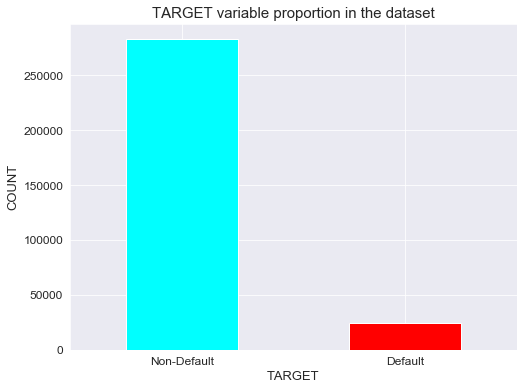

In [46]:
plt.figure(figsize=[8,6])
app.TARGET.value_counts().plot.bar(color=['cyan','red'])
plt.title('TARGET variable proportion in the dataset',fontsize=15)
x = [0,1]
labels = ['Non-Default', 'Default']
plt.xlabel('TARGET',fontsize=13)
plt.ylabel('COUNT',fontsize=13)
plt.xticks(x, labels, fontsize=12, rotation='horizontal')
plt.yticks(fontsize=12)
plt.show()

- <b>An imbalance is seen in the TARGET variable. The Defaulting applicants are much less as comapred to the Non Defaulting applicants.</b>

## Splitting the DATA FRAME on the basis of TARGET variable

In [47]:
target1 = app[app['TARGET']==1]
target0 = app[app['TARGET']==0]

### Calculating the Imbalance percentage

In [48]:
round((len(target0)-len(target1))/len(target0),2)

0.91

In [49]:
target1.shape

(24825, 75)

In [50]:
target0.shape

(282686, 75)

## Univariate Analysis for Numerical Columns

#### <b>Function to plot histograms of various columnns to see the affect on the TARGET VARIABLE</b>

In [85]:
sns.set_style('darkgrid')
def plot_dist(df,df1,cols):
    for col in cols:
        plt.figure(figsize=[15,4])
        sns.distplot(df[col], hist=False, label='Default')
        sns.distplot(df1[col], hist=False, label='Non-Default/Other cases')
        plt.title('Distribution of '+col,fontsize=15)
        plt.xlabel(col,fontsize=13)
        plt.ylabel('COUNT',fontsize=13)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

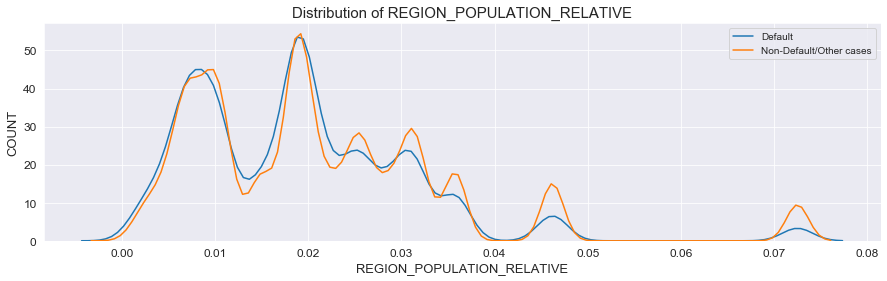

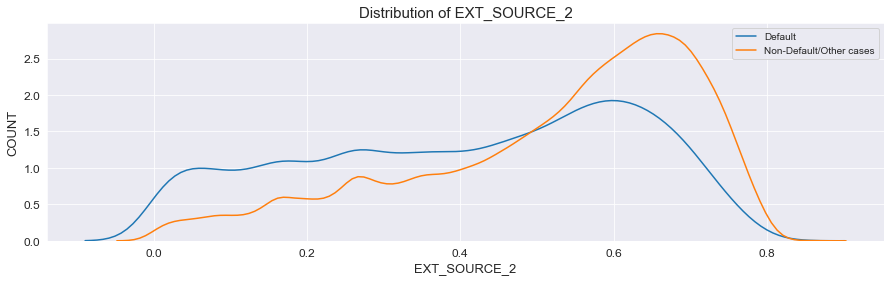

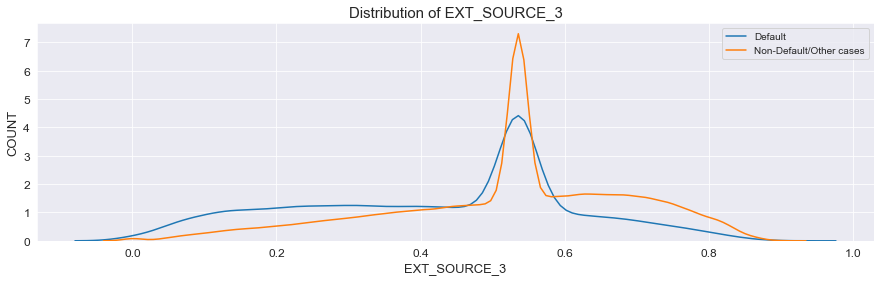

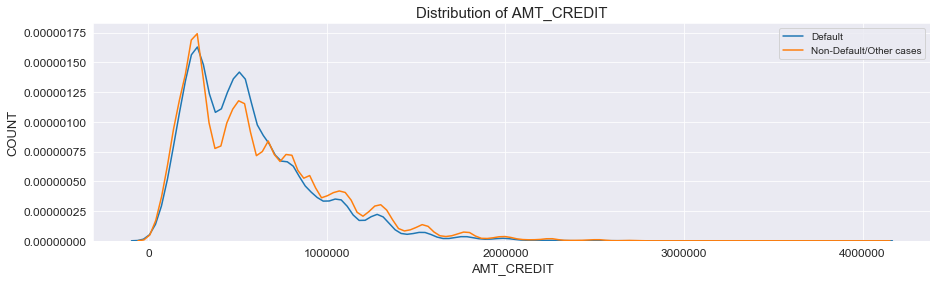

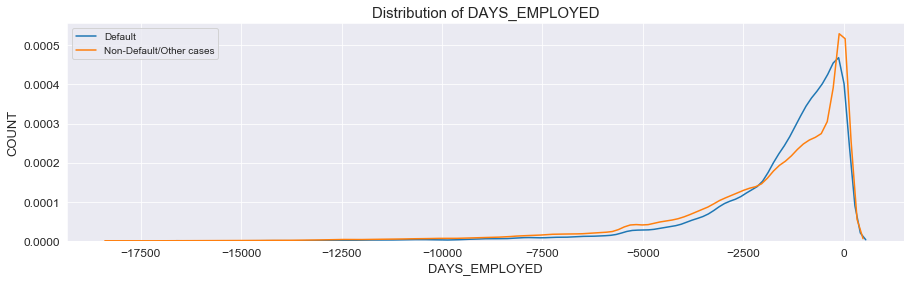

In [86]:

plot_dist(target1,target0,['REGION_POPULATION_RELATIVE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_CREDIT','DAYS_EMPLOYED'])

#### Inferences:
- <b>The higher 'External Source 2' and 'External Source 3' values idicate that there are less chances of default while its low values indicate the higher chances of default rate.
- Applicants with low employment days tend to default more while applicants with more employments days do not have payment difficulties.</b>

## Univariate Analysis for Categorical Columns

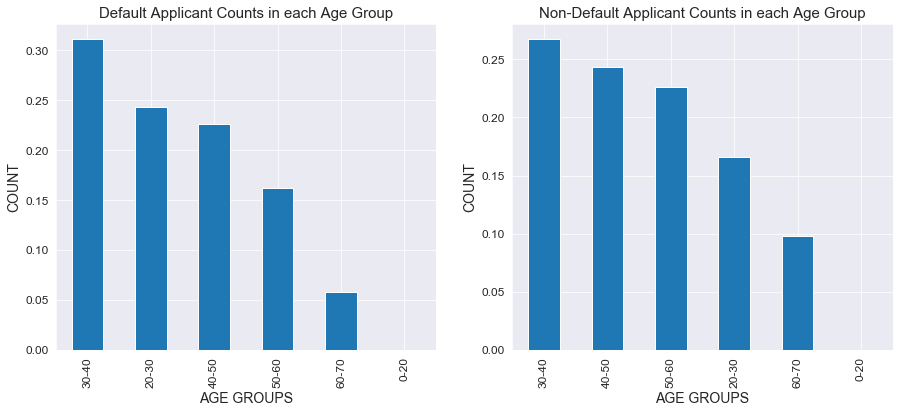

In [53]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title('Default Applicant Counts in each Age Group', fontsize=15)
plt.xlabel('AGE GROUPS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
target1.AGE_RANGE.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title('Non-Default Applicant Counts in each Age Group', fontsize=15)
plt.xlabel('AGE GROUPS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
target0.AGE_RANGE.value_counts(normalize=True).plot.bar()
plt.show()

#### Inferences:
- <b>Age group of 30-40 seem to have more default rate while age 60-70 have very less default rate.

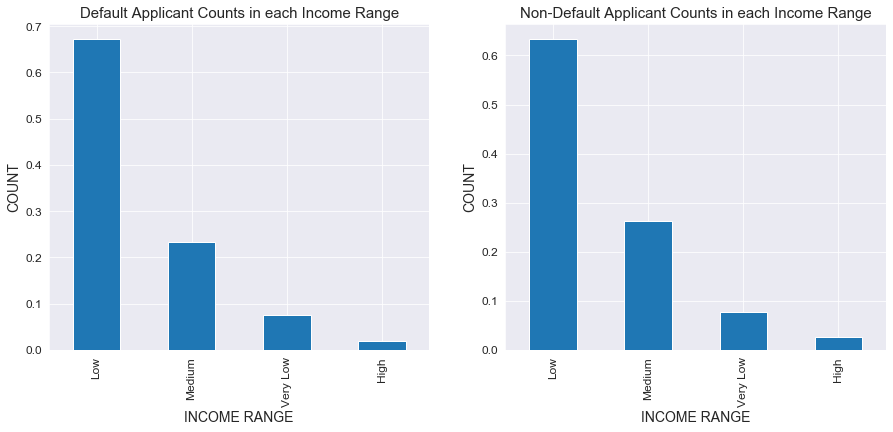

In [54]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.title('Default Applicant Counts in each Income Range', fontsize=15)
plt.xlabel('INCOME RANGE',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
target1.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title('Non-Default Applicant Counts in each Income Range', fontsize=15)
plt.xlabel('INCOME RANGE',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
target0.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar()
plt.show()

#### Inferences :

- <b>Borrower with high income has no difficulties in payment.
- Borrower with very low income has the highest requirement of loan and thus we find that they are also highest in defaulter list.</b>
    

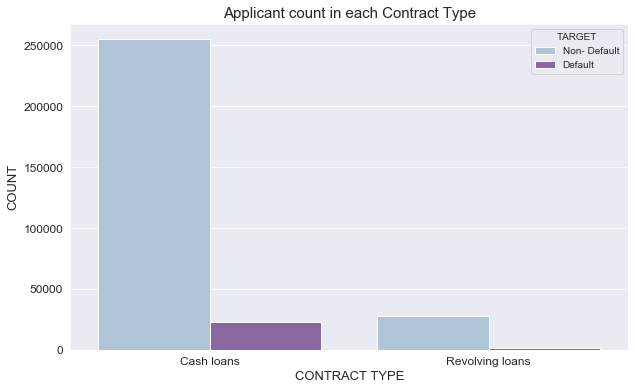

In [55]:
plt.figure(figsize=[10,6])
ax=sns.countplot(x='NAME_CONTRACT_TYPE',data=app, hue='TARGET', palette='BuPu')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Applicant count in each Contract Type',fontsize=15)
plt.xlabel('CONTRACT TYPE',fontsize=13)
plt.ylabel('COUNT',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Inferences
- <b>Cash Loan applicants seem to have a higher default rate than the other contract type.</b>

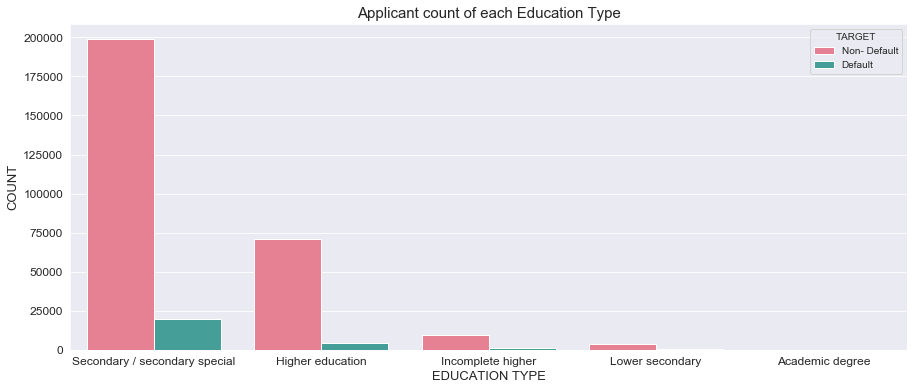

In [56]:
plt.figure(figsize=[15,6])
ax=sns.countplot(x='NAME_EDUCATION_TYPE',data=app, hue='TARGET', palette='husl')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Applicant count of each Education Type',fontsize=15)
plt.xlabel('EDUCATION TYPE',fontsize=13)
plt.ylabel('COUNT',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Inferences
- <b>Secondary Educated people seem to default more.Secondary Educated people seem to more likely  default . There is no defaulter for people with Lower secondary.
 </b>

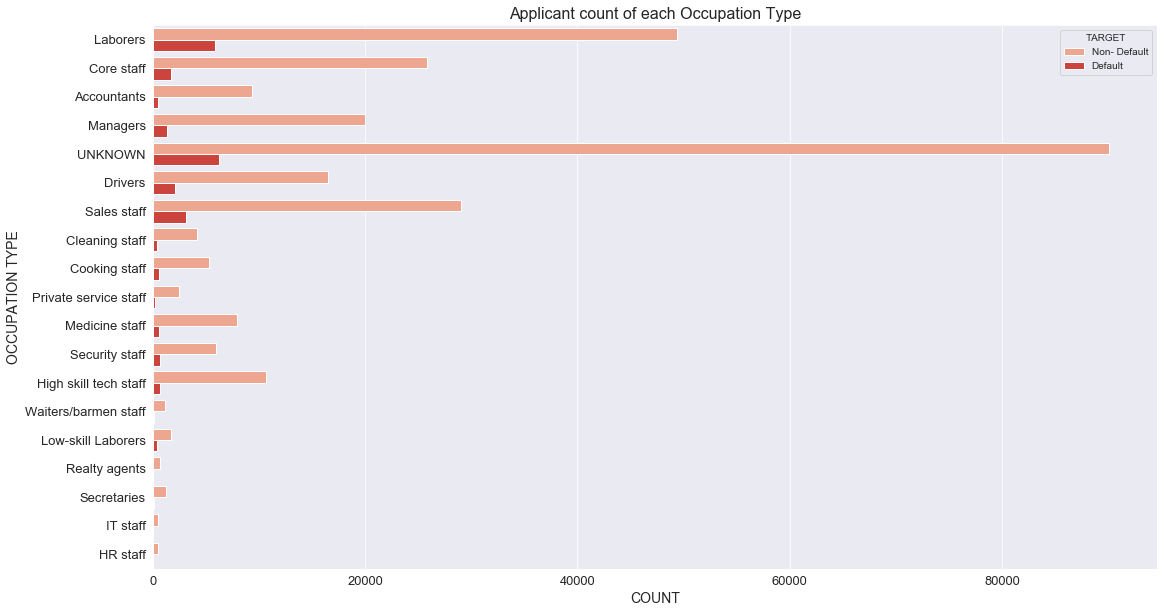

In [57]:
plt.figure(figsize=[18,10])
ax=sns.countplot(y='OCCUPATION_TYPE',data=app, hue='TARGET', palette='Reds')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Applicant count of each Occupation Type',fontsize=16)
plt.ylabel('OCCUPATION TYPE',fontsize=14)
plt.xlabel('COUNT',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Inferences:
- <b>Labourers have the highest non defaulter rate as compared to other occupations. 
- Private services Staff, Realty agents, Secreatanies, IT staff are seen to be repaying loan on time. </b>

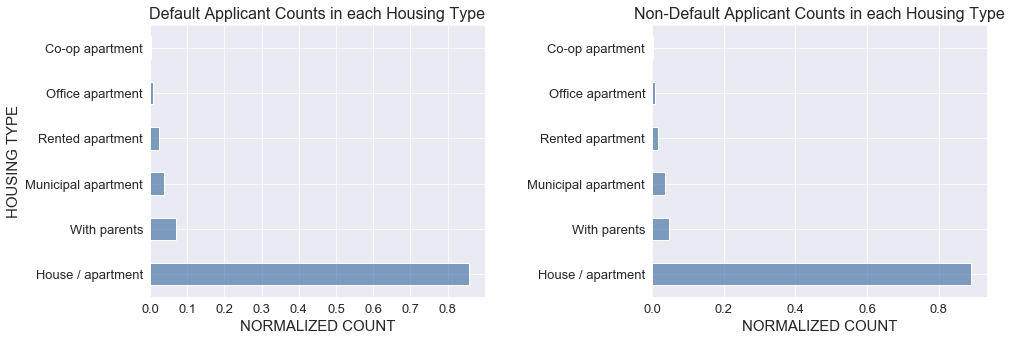

In [58]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.title('Default Applicant Counts in each Housing Type', fontsize=16)
plt.xlabel('NORMALIZED COUNT',fontsize=15)
plt.ylabel('HOUSING TYPE',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
target1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color=(0.2, 0.4, 0.6, 0.6))

plt.subplot(1,2,2)
plt.title('Non-Default Applicant Counts in each Housing Type', fontsize=16)
plt.xlabel('NORMALIZED COUNT',fontsize=15)
plt.ylabel(None)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
target0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh(color=(0.2, 0.4, 0.6, 0.6))
plt.show()

#### Inferences:
- <b>Applicants staying with parents and in rented or municipal apparments/houses have more default rate</b>

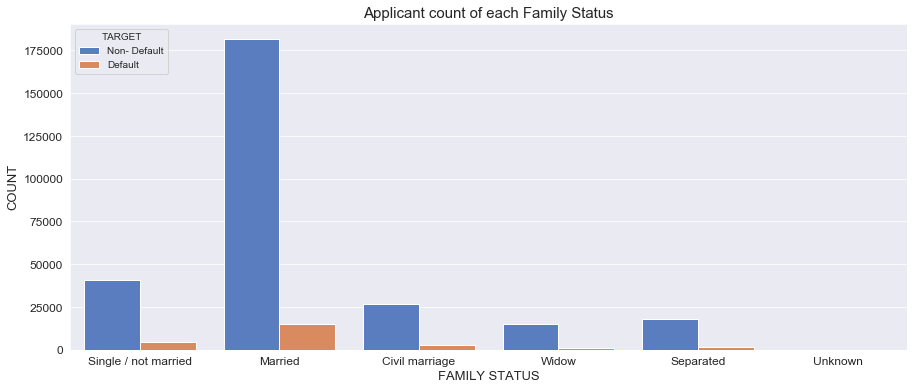

In [59]:
plt.figure(figsize=[15,6])
ax=sns.countplot(x='NAME_FAMILY_STATUS',data=app, hue='TARGET', palette='muted')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Applicant count of each Family Status',fontsize=15)
plt.xlabel('FAMILY STATUS',fontsize=13)
plt.ylabel('COUNT',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Inferences:
- <b>Married applicants tend to default more. Married applicants tend to default more whereas widows are the least in the defaulter list.
</b>

## Bivariate Analysis  

- <b>Plotting a pairplot for few continuos variables, 'AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE' to observe the relation between them</b>

<Figure size 1080x360 with 0 Axes>

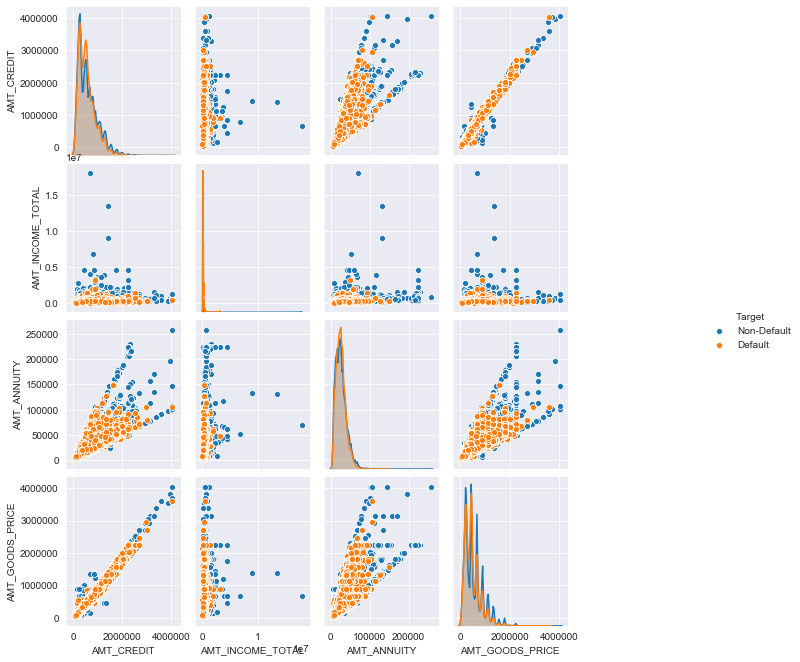

In [87]:
plt.figure(figsize=[15,5])
g=sns.pairplot(data=app, vars=['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_GOODS_PRICE'], hue='TARGET')
legend = g._legend
legend.set_title("Target")
for t, l in zip(legend.texts,("Non-Default", "Default")):
    t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)

#### Inferences from the above plot
- <b>We can see that people who have higher Goods price have more credit amount.
- Default Rate is more for applicants with lower income.
- Also, higher the credit, chances of default is high</b>

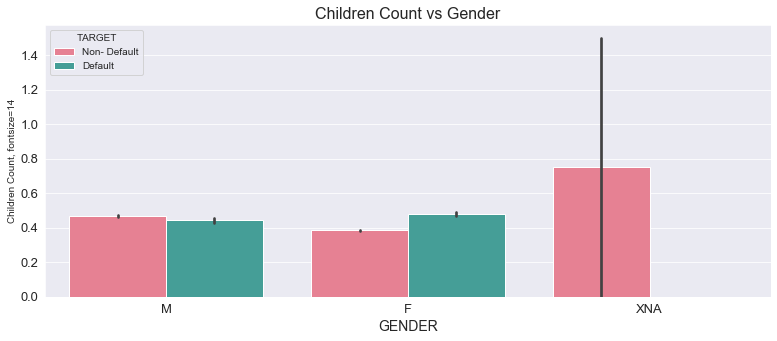

In [61]:
plt.figure(figsize=[13,5])
ax=sns.barplot(data=app, x='CODE_GENDER', y='CNT_CHILDREN', hue='TARGET',palette='husl')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Children Count vs Gender',fontsize=16)
plt.ylabel('Children Count, fontsize=14')
plt.xlabel('GENDER',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Inferences:
- <b>Female applicants with more children tend to defualt</b>

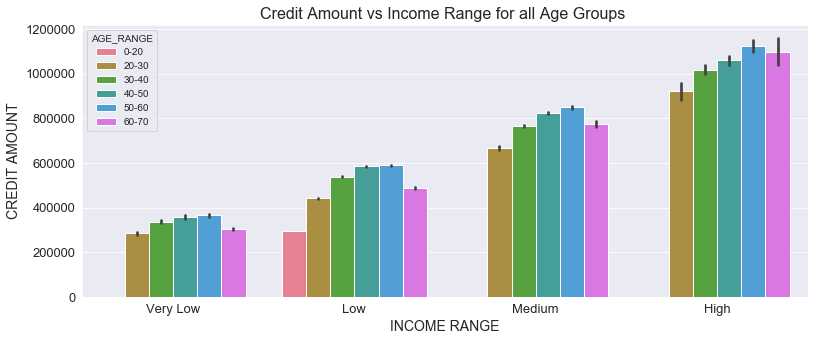

In [62]:
plt.figure(figsize=[13,5])
sns.barplot(data=app, x='AMT_INCOME_RANGE', y='AMT_CREDIT', hue='AGE_RANGE',palette='husl')
plt.title('Credit Amount vs Income Range for all Age Groups ',fontsize=16)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('INCOME RANGE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Inferences:
- <b>As the Income increases, loan credit amount also increases.
- Age group of 20-30 annd 60-70 tend to take lesser loan amount compared to the other age groups irrespective of the income.</b>

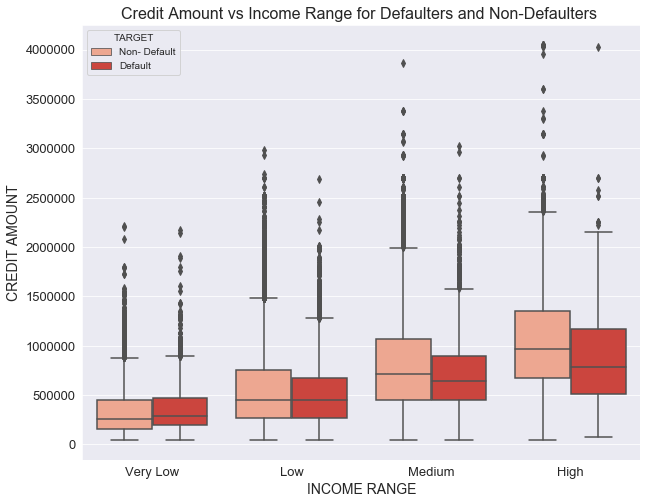

In [63]:
plt.figure(figsize=[10,8])
ax=sns.boxplot(app['AMT_INCOME_RANGE'],app.AMT_CREDIT, hue=app.TARGET, palette='Reds')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Credit Amount vs Income Range for Defaulters and Non-Defaulters ',fontsize=16)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('INCOME RANGE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Inferences:

- <b>Very low income applicants with higher credit amount has chances to default.
- High income applicants with higher credit seem to have no difficulties in payment.</b>

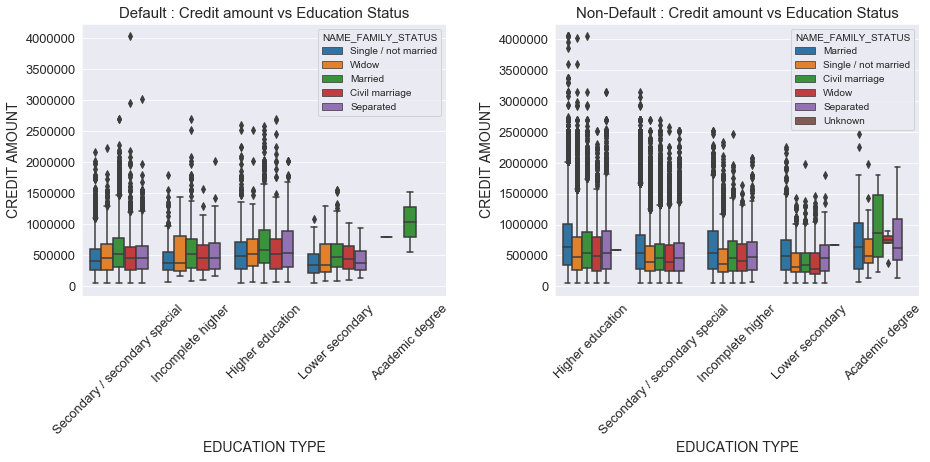

In [88]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Default : Credit amount vs Education Status',fontsize=15)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('EDUCATION TYPE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Non-Default : Credit amount vs Education Status',fontsize=15)
plt.ylabel('CREDIT AMOUNT',fontsize=14)
plt.xlabel('EDUCATION TYPE',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=45)
plt.show()

#### Inferences from the above plot
- <b>Highly educated married people tend to have credit amount higher than married lower secondary education.
- Higher education people seems to make payments on time.
- Widows have the lowest credit amount. </b>

## Finding Correlations

#### Top 10 Correlation from applicants from the Non-Default Category of applicants 

In [65]:
#Correlation matrix for numerical columns
corr0=target0[['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
              'AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
             'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr0=corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corrdf0 = corr0.stack().reset_index()
corrdf0.dropna(inplace = True)
corrdf0.columns=['ATTR1','ATTR2','Correlation']
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
corrdf0.sort_values(by = 'Correlation', ascending = False).head(10)

,ATTR1,ATTR2,Correlation
324,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.00
79,AMT_CREDIT,AMT_GOODS_PRICE,0.99
258,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.95
36,CNT_CHILDREN,CNT_FAM_MEMBERS,0.88
334,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.86
102,AMT_ANNUITY,AMT_GOODS_PRICE,0.78
78,AMT_CREDIT,AMT_ANNUITY,0.77
54,AMT_INCOME_TOTAL,AMT_ANNUITY,0.42
55,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.35
53,AMT_INCOME_TOTAL,AMT_CREDIT,0.34


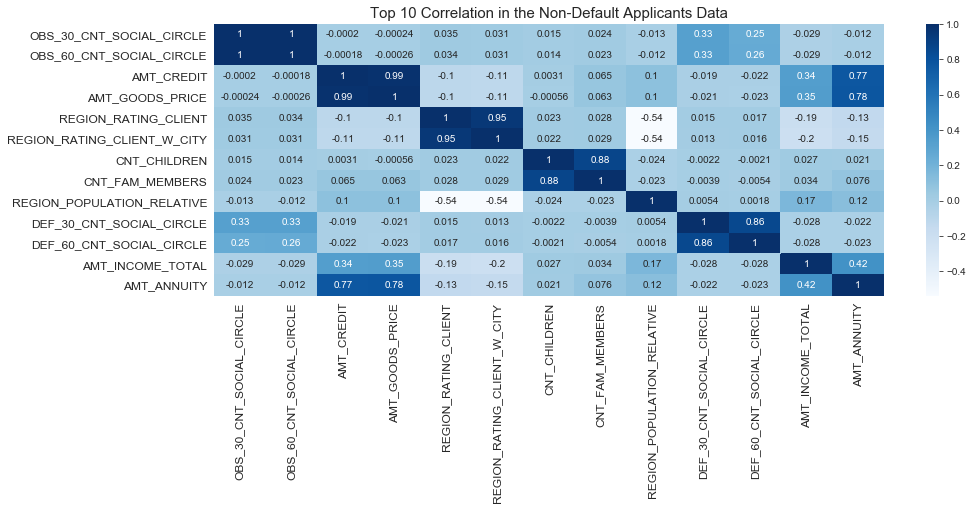

In [89]:
plt.figure(figsize=[15,5])
sns.heatmap(target0[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT',
                   'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_POPULATION_RELATIVE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(),
            cmap='Blues',annot=True)
plt.title('Top 10 Correlation in the Non-Default Applicants Data',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Inferences from the above plot

- <b>Higher the goods price, higher will be the Amount Credit.
- There seems to have a negative correlation between the Region Population and the Region Rating.
- Amount income and amount of credit seems to be slightly positively correlated. </b>


#### Top 10 Correlation from applicants from the Default Category of applicants

In [67]:
corr1=target1[['SK_ID_CURR','TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
              'AGE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
             'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
                'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                     'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()
corr1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corrdf1 = corr1.stack().reset_index()
corrdf1.columns = ['ATTR1', 'ATTR2', 'Correlation']
corrdf1.dropna(inplace = True)
corrdf1['Correlation'] = round(corrdf1['Correlation'], 2)
corrdf1['Correlation'] = corrdf1['Correlation'].abs()
corrdf1.sort_values(by = 'Correlation', ascending = False).head(10)

,ATTR1,ATTR2,Correlation
324,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,1.00
79,AMT_CREDIT,AMT_GOODS_PRICE,0.98
258,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.96
36,CNT_CHILDREN,CNT_FAM_MEMBERS,0.89
334,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.87
78,AMT_CREDIT,AMT_ANNUITY,0.75
102,AMT_ANNUITY,AMT_GOODS_PRICE,0.75
153,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT_W_CITY,0.45
152,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.44
54,AMT_INCOME_TOTAL,AMT_ANNUITY,0.40


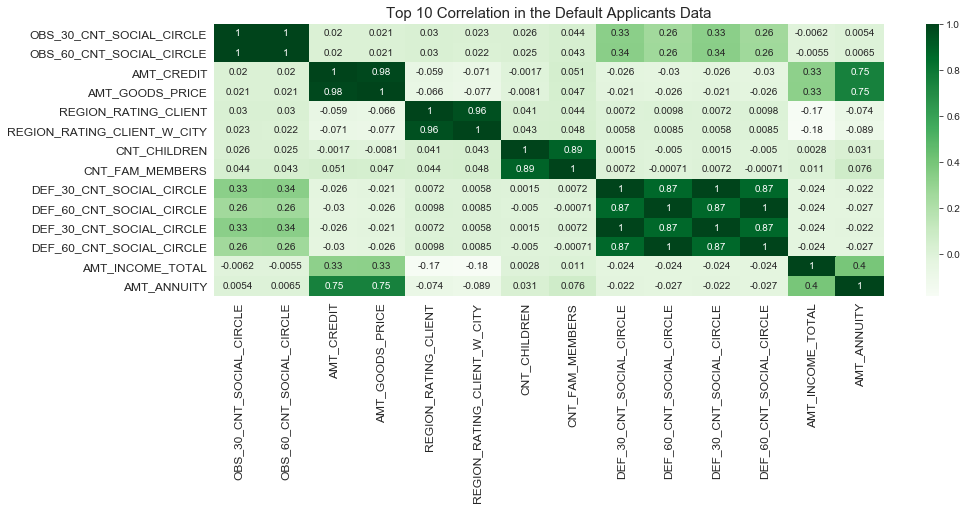

In [90]:
plt.figure(figsize=[15,5])
sns.heatmap(target1[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_CREDIT','AMT_GOODS_PRICE','REGION_RATING_CLIENT',
                   'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                     'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_INCOME_TOTAL','AMT_ANNUITY']].corr(), cmap="Greens",
            annot=True)
plt.title('Top 10 Correlation in the Default Applicants Data',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Inferences from the above plot

- <b>There is not much difference between non-defaulter and defaulter correlation. It seems to be almost same.
- There is a negative correlation between the Income of the Client and the Region Rating where the Client Stays. Similaryl, there is a negative correlation between the Income of the Client and the Region Rating w.r.t the city.</b>



## Reading Previous Application dataset

In [69]:
prev = pd.read_csv('previous_application.csv')

In [70]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspecting and cleaning the previous application dataset

In [71]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [72]:
missingVals(prev)

                                             column_name  percent_missing
RATE_INTEREST_PRIVILEGED        RATE_INTEREST_PRIVILEGED        99.643698
RATE_INTEREST_PRIMARY              RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT                        AMT_DOWN_PAYMENT        53.636480
RATE_DOWN_PAYMENT                      RATE_DOWN_PAYMENT        53.636480
NAME_TYPE_SUITE                          NAME_TYPE_SUITE        49.119754
NFLAG_INSURED_ON_APPROVAL      NFLAG_INSURED_ON_APPROVAL        40.298129
DAYS_TERMINATION                        DAYS_TERMINATION        40.298129
DAYS_LAST_DUE                              DAYS_LAST_DUE        40.298129
DAYS_LAST_DUE_1ST_VERSION      DAYS_LAST_DUE_1ST_VERSION        40.298129
DAYS_FIRST_DUE                            DAYS_FIRST_DUE        40.298129
DAYS_FIRST_DRAWING                    DAYS_FIRST_DRAWING        40.298129
AMT_GOODS_PRICE                          AMT_GOODS_PRICE        23.081773
AMT_ANNUITY                           

#### Dropping the columns with values less than 40%

In [73]:
prev = prev.drop(['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE'], axis=1)

In [74]:
missingVals(prev)

                                             column_name  percent_missing
AMT_GOODS_PRICE                          AMT_GOODS_PRICE        23.081773
AMT_ANNUITY                                  AMT_ANNUITY        22.286665
CNT_PAYMENT                                  CNT_PAYMENT        22.286366
PRODUCT_COMBINATION                  PRODUCT_COMBINATION         0.020716
AMT_CREDIT                                    AMT_CREDIT         0.000060
CODE_REJECT_REASON                    CODE_REJECT_REASON         0.000000
NAME_YIELD_GROUP                        NAME_YIELD_GROUP         0.000000
NAME_SELLER_INDUSTRY                NAME_SELLER_INDUSTRY         0.000000
SELLERPLACE_AREA                        SELLERPLACE_AREA         0.000000
CHANNEL_TYPE                                CHANNEL_TYPE         0.000000
NAME_PRODUCT_TYPE                      NAME_PRODUCT_TYPE         0.000000
NAME_PORTFOLIO                            NAME_PORTFOLIO         0.000000
NAME_GOODS_CATEGORY                  N

#### Replacing continuous values with median

In [75]:
replaceNull(prev,['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT'])

In [76]:
prev.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

#### Missing values in Categorical variable PRODUCT_COMBINATION should be replaced with the MODE value 'Cash'

In [77]:
prev['PRODUCT_COMBINATION'].fillna(prev.PRODUCT_COMBINATION.mode()[0], inplace=True)

In [78]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


## Merging the application.csv and previous_application.csv datasets

In [79]:
app_prev = app.merge(prev,on='SK_ID_CURR',suffixes=('_app', '_prev'))

In [80]:
app_prev.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_app,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_app,AMT_ANNUITY_app,AMT_GOODS_PRICE_app,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_app,HOUR_APPR_PROCESS_START_app,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,Medium,20-30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,Medium,40-50,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,Medium,40-50,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1,0,1,0,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,Medium,40-50,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving

## Univariate Analysis

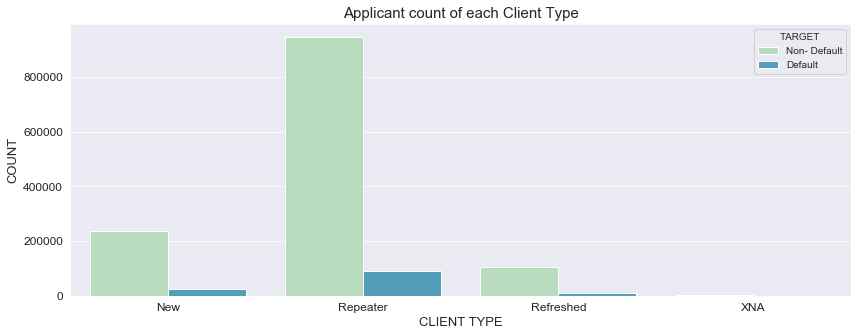

In [81]:
plt.figure(figsize=[14,5])
ax=sns.countplot(data=app_prev, hue='TARGET', x='NAME_CLIENT_TYPE', palette='GnBu')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Applicant count of each Client Type',fontsize=15)
plt.xlabel('CLIENT TYPE',fontsize=13)
plt.ylabel('COUNT',fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Inferences
- <b>More defaults are seen in the 'REPEATER' client category</b>

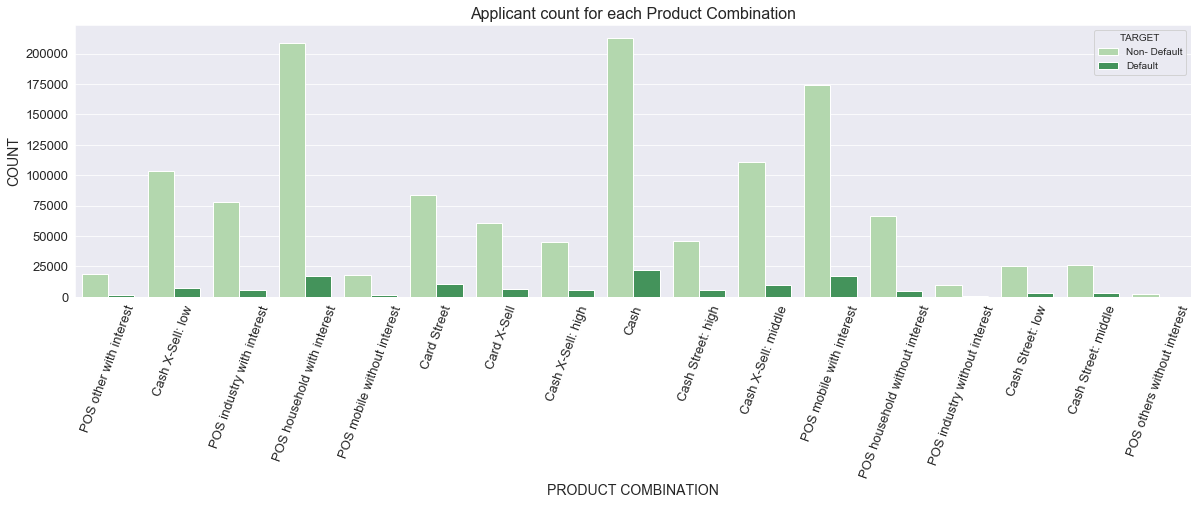

In [82]:
plt.figure(figsize=[20,5])
ax=sns.countplot(data=app_prev, hue='TARGET', x='PRODUCT_COMBINATION', palette='Greens')
plt.xticks(rotation = 70)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Applicant count for each Product Combination',fontsize=16)
plt.xlabel('PRODUCT COMBINATION',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Inferences
- <b>More defaults are seen in the 'CASH' product combination category.</b>

## Multivariate Analysis

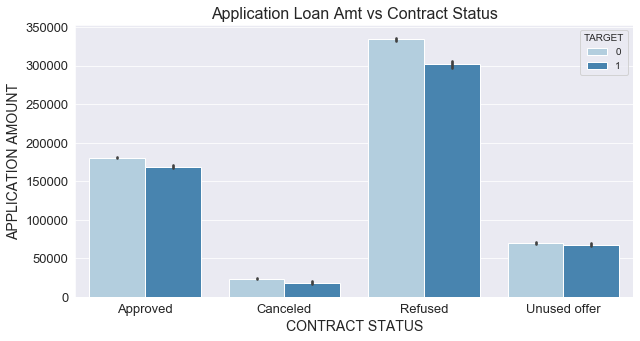

In [83]:
plt.figure(figsize=[10,5])
sns.barplot(data=app_prev, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', hue='TARGET', palette='Blues')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Application Loan Amt vs Contract Status',fontsize=16)
plt.xlabel('CONTRACT STATUS',fontsize=14)
plt.ylabel('APPLICATION AMOUNT',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Inferences
- <b>There are people who applied for high amount and did not have payment difficulties but yet they were rejected for the loan. 
- Most applications with application amount greater than 2 lakh are rejected. </b>

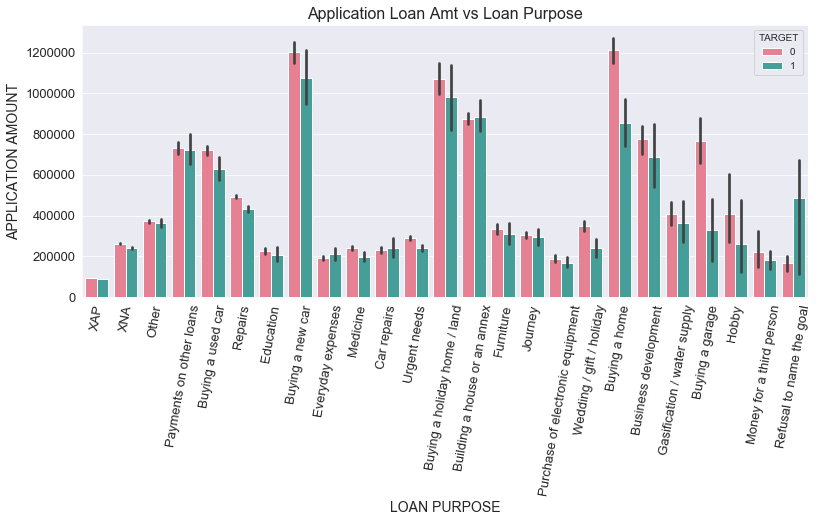

In [84]:
plt.figure(figsize=[13,5])
sns.barplot(data=app_prev, x='NAME_CASH_LOAN_PURPOSE', y='AMT_APPLICATION', hue='TARGET',palette='husl')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non- Default','Default'],title='TARGET')
plt.title('Application Loan Amt vs Loan Purpose',fontsize=16)
plt.xlabel('LOAN PURPOSE',fontsize=14)
plt.ylabel('APPLICATION AMOUNT',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation = 80)
plt.show()

#### Inferences:
- <b>Applicants who refuse to name the purpose and ask for more loan amount have chances to default.   
- Also, applicants requesting more loan amount for buying a car, holiday home, land and building a house/annex have chances to default. 
- Applicants taking loan amt for buying a house or garage have less chances of defaults. </b>

## Conclusion
- Bank should focus on people with higher education as they  have very less defaulters as compared to other education type.
- Bank should focus on people with high income as they seem to pay their loan on time and thus have a better credit score.
- Private services Staff, Realty agents, Secreatanies, IT staff are seen to be repaying loan on time thus bank should do more business with them.
- Bank should avoid applicants who refuse to name the purpose and ask for more loan amount as they have chances to default.
- Bank can check the background of applicants in the age group of 30-40 as and applicants who stay with parents or in rented appartments as seem to have more default rate.